In [5]:
# In this cell we perform one time task of Caliberation: mtx, dist
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

CALIBRATE = True
PERSPECTIVE = True
DISPLAY = False

# Load calibration and perspective
npzfile = np.load('calibration_n_perspective.npz')
mtx  = npzfile['mtx']
dist = npzfile['dist']
M    = npzfile['M']

if CALIBRATE:
    nx = 9
    ny = 6
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob( './camera_cal/calibration*.jpg')

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                           (img.shape[1], img.shape[0]), None,None)
    
if DISPLAY:
    img = cv2.imread('./camera_cal/calibration20.jpg')
    plt.imshow(img)
    plt.show()
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undist)
    plt.show()

In [6]:
# In this cell we perform one time task of getting perspective transform matrix: M
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

FARTHER = True

if FARTHER:
    pt1 = [575, 465]
    pt2 = [708, 465]
    pt3 = [1040, 678]
    pt4 = [265, 678]
else:
    pt1 = [540, 490]
    pt2 = [748, 490]
    pt3 = [1040, 678]
    pt4 = [265, 678]

src = np.float32([pt1, pt2, pt3, pt4])

pt1 = [300, 0]
pt2 = [1010, 0]
pt3 = [1010, 720]
pt4 = [300, 720]
dst = np.float32([pt1, pt2, pt3, pt4])

if PERSPECTIVE:
    M = cv2.getPerspectiveTransform(src, dst)

    
    
Minv = cv2.getPerspectiveTransform(dst, src)

if DISPLAY:
    img = mpimg.imread('./test_images/straight_lines1.jpg')
    fname = './test_images/straight_lines1_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()

    img = mpimg.imread('./test_images/straight_lines2.jpg')
    fname = './test_images/straight_lines2_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()
    print(img.shape)

#np.savez('calibration_n_perspective', mtx = mtx, dist = dist, M = M)

In [33]:
if DISPLAY:
    img = mpimg.imread('./test_images/test6.jpg')
    fname = './test_images/test2_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if orient == 'x':
        sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.absolute(sobel)    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    grad_binary     = np.zeros_like(scaled_sobel)
    grad_binary[(thresh[0] <= scaled_sobel) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.sqrt(np.square(sobelx) + np.square(sobely))    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    mag_binary  = np.zeros_like(scaled_sobel)
    mag_binary[(mag_thresh[0] <= scaled_sobel) & (scaled_sobel <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    abs_sobelx = np.absolute(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    
    grad_direction  = np.arctan2(abs_sobely, abs_sobelx)  
    dir_binary      = np.zeros_like(grad_direction)
    dir_binary[(thresh[0] <= grad_direction) & (grad_direction <= thresh[1])] = 1
    return dir_binary


def hls_select(img, thresh=(0, 255), channel = 's'):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if channel == 'h':
        C = hls[:,:,0]
    if channel == 'l':    
        C = hls[:,:,1]
    if channel == 's':
        C = hls[:,:,2]

    C = np.absolute(C).astype(float)
    C = np.uint8(255*C/np.max(C))
    binary_output = np.zeros_like(C) 
    binary_output[(thresh[0] < C) & (C <= thresh[1])] = 1
    return binary_output

def rgb_select(img, thresh=(0, 255), channel = 'r'):
    if channel == 'r':
        C = img[:,:,0]
    if channel == 'g':    
        C = img[:,:,1]
    if channel == 'b':
        C = img[:,:,2]

    C = np.absolute(C).astype(float)
    C = np.uint8(255*C/np.max(C))
    binary_output = np.zeros_like(C) 
    binary_output[(thresh[0] < C) & (C <= thresh[1])] = 1
    return binary_output    

# Edit this function to create your own pipeline.
'''Pipeline:
1. undistort the image using mtx, dist
1. Apply combination threshold to get a binary image with potential lane line pixels.
1. Apply perspective transformation to get the bird eye view.
'''

def pipeline(img, ksize = 3):
    image = cv2.undistort(img, mtx, dist, None, mtx)
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100), nchannels = 3)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100), nchannels = 3)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(20, 255), nchannels = 3)
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, 1.4), nchannels = 3)
    s_binary = hls_select(image, thresh=(40, 255), channel = 's')
    h_binary = hls_select(image, thresh=(15, 100), channel = 'h')
    r_binary = rgb_select(image, thresh=(150, 255), channel = 'r')
    

    # Combine various binaries 
    combined_binary = np.zeros_like(image[:,:,0])
    combined_binary[gradx == 1] = 1
    combined_binary[grady == 1] = 1
    combined_binary[h_binary == 1] = 1
    combined_binary[r_binary == 1] = 1
    combined_binary[s_binary == 1] = 1
    combined_binary[mag_binary == 0] = 0
    combined_binary[dir_binary == 0] = 0
    
    binary_image = cv2.warpPerspective(combined_binary, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_NEAREST)  # keep same size as input image    
    return binary_image   



# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

        
def find_lanes(binary_warped, image):    
    window_width = 10
    window_filter = np.ones(window_width)    
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    l_sum = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:int(binary_warped.shape[1]/2)], axis=0)
    leftx_base = np.argmax(np.convolve(window_filter,l_sum))-window_width/2
    r_sum = np.sum(binary_warped[int(binary_warped.shape[0]/2):,int(binary_warped.shape[1]/2):], axis=0)
    rightx_base = np.argmax(np.convolve(window_filter,r_sum))-window_width/2 + int(binary_warped.shape[1]/2)

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Update the Line class
    left_lane.current_fit  = left_fit
    right_lane.current_fit = right_fit
    left_lane.detected = True
    right_lane.detected = True
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # print the curvature of the road
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print(left_curverad, right_curverad)
    
    
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255    
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    '''
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)   
    '''
    
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin1 = 10
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin1, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin1, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin1, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin1, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (255,0, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (255,0, 0))
    #image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    window_img = cv2.warpPerspective(window_img, Minv, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    result = cv2.addWeighted(image, 1, window_img, 0.8, 0)   
    
    return result

def update_lanes(binary_warped, left_lane, right_lane, image):
    FIT2WICE = True
    left_fit  = left_lane.current_fit
    right_fit = right_lane.current_fit    
    
    print(left_fit)
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    margin = 100
    
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin)))

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]    
    # Fit a second order polynomial to each
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if FIT2WICE:    
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
        left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
        left_fit[1]*nonzeroy + left_fit[2] + margin)))

        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
        right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
        right_fit[1]*nonzeroy + right_fit[2] + margin)))  

        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]    
        # Fit a second order polynomial to each
    
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    
    '''
    # Check if the lane lines are real using 
    1. similar curvature
    2. almost parallel
    3. sensible distance as lane width
    
    if all sanity checks passed then merge the coefficients

    left_fit[0] = (left_fit[0] + right_fit[0])/2
    left_fit[1] = (left_fit[1] + right_fit[1])/2        
    right_fit[0] = left_fit[0]
    right_fit[1] = left_fit[1]
   
    left_fit[0] = (left_fit[0] + right_fit[0])/2
    left_fit[1] = (left_fit[1] + right_fit[1])/2        
    right_fit[0] = left_fit[0]
    right_fit[1] = left_fit[1]
'''
    
    # Update the Line class
    left_lane.current_fit  = left_fit
    right_lane.current_fit = right_fit
    left_lane.detected = True
    right_lane.detected = True
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255    
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255*0.1, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255*0.1]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin1 = 10
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin1, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin1, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin1, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin1, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (255,0, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (255,0, 0))
    #image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    window_img = cv2.warpPerspective(window_img, Minv, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    result = cv2.addWeighted(image, 1, window_img, 0.8, 0)   
    
    # print the curvature of the road
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print(left_curverad, right_curverad)
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/710 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')    
    
    return result


./test_images/test5.jpg
2015.1776087504209 31483.701943187614
[ 2.49778554e-04 -2.92404084e-01  3.56736771e+02]


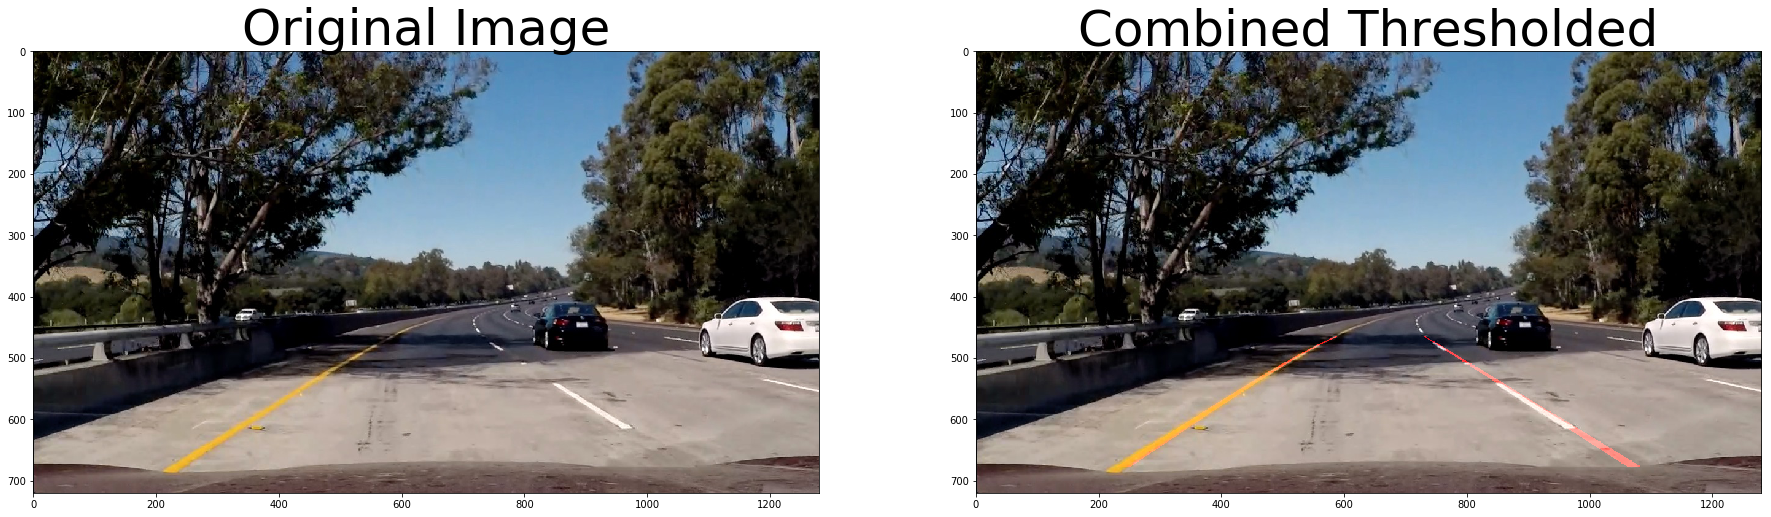

./test_images/test1.jpg
[ 2.49778554e-04 -2.92404084e-01  3.56736771e+02]
15161.21450896767 243986.89820680433
4852.230660040118 m 77673.14077704464 m
[-3.43513205e-05 -1.16598884e-01  4.15766374e+02]


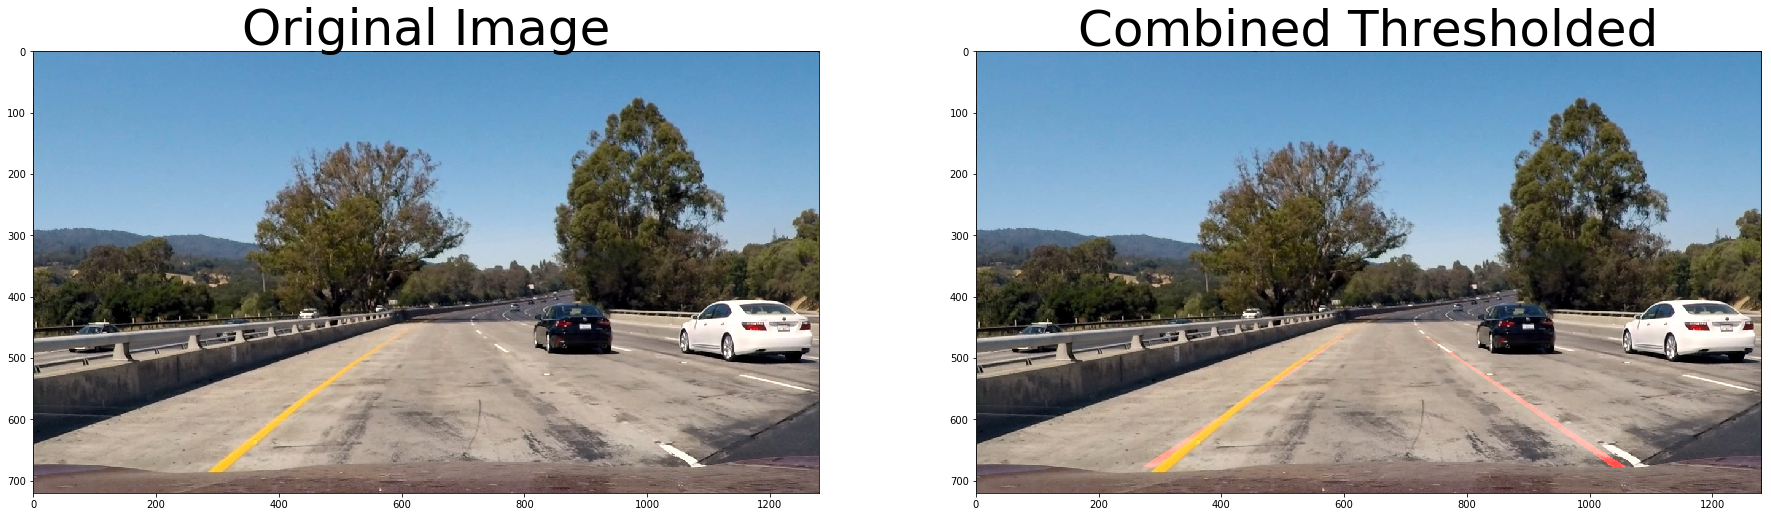

./test_images/test4.jpg
[-3.43513205e-05 -1.16598884e-01  4.15766374e+02]
2186.6443364546426 1016.0621955565911
592.5845139445012 m 274.01198432863345 m
[-2.82087076e-04  1.80134979e-02  4.56242759e+02]


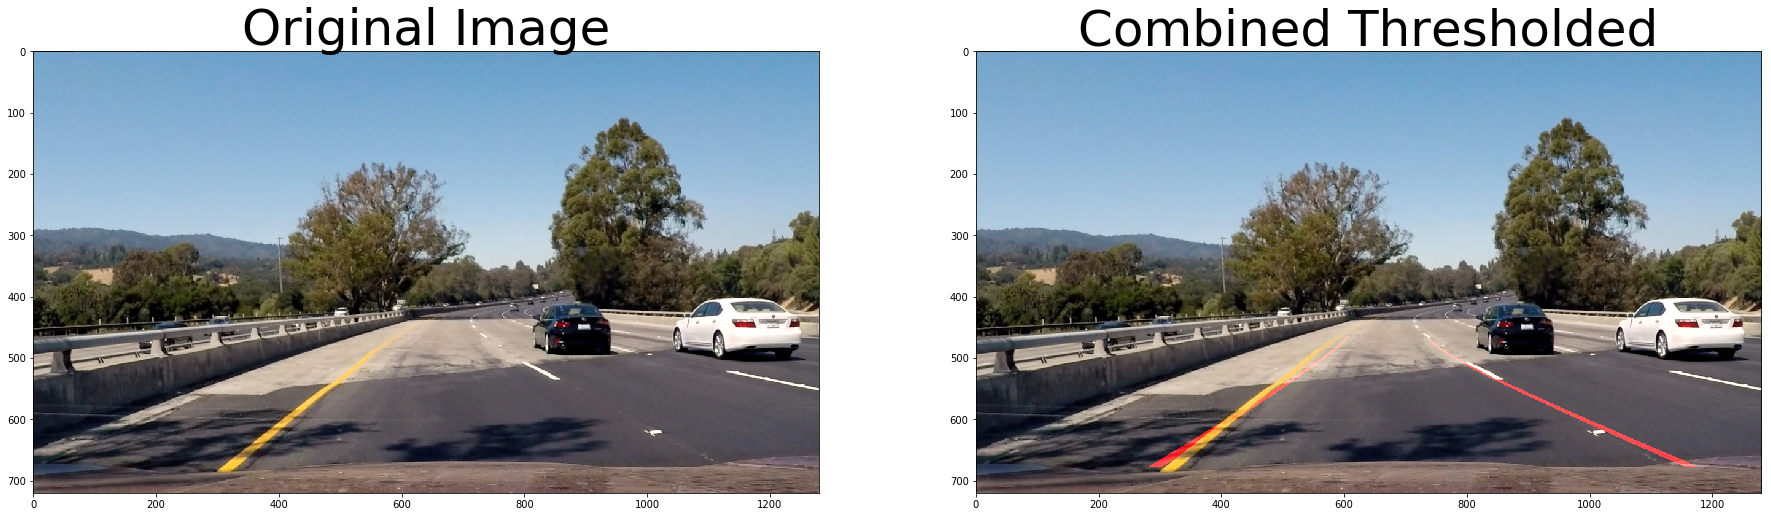

./test_images/test3.jpg
[-2.82087076e-04  1.80134979e-02  4.56242759e+02]
5143.11252117549 2372.777635193178
1688.0451650432574 m 789.3543650572431 m
[ 9.87014466e-05 -2.42685560e-01  4.52048483e+02]


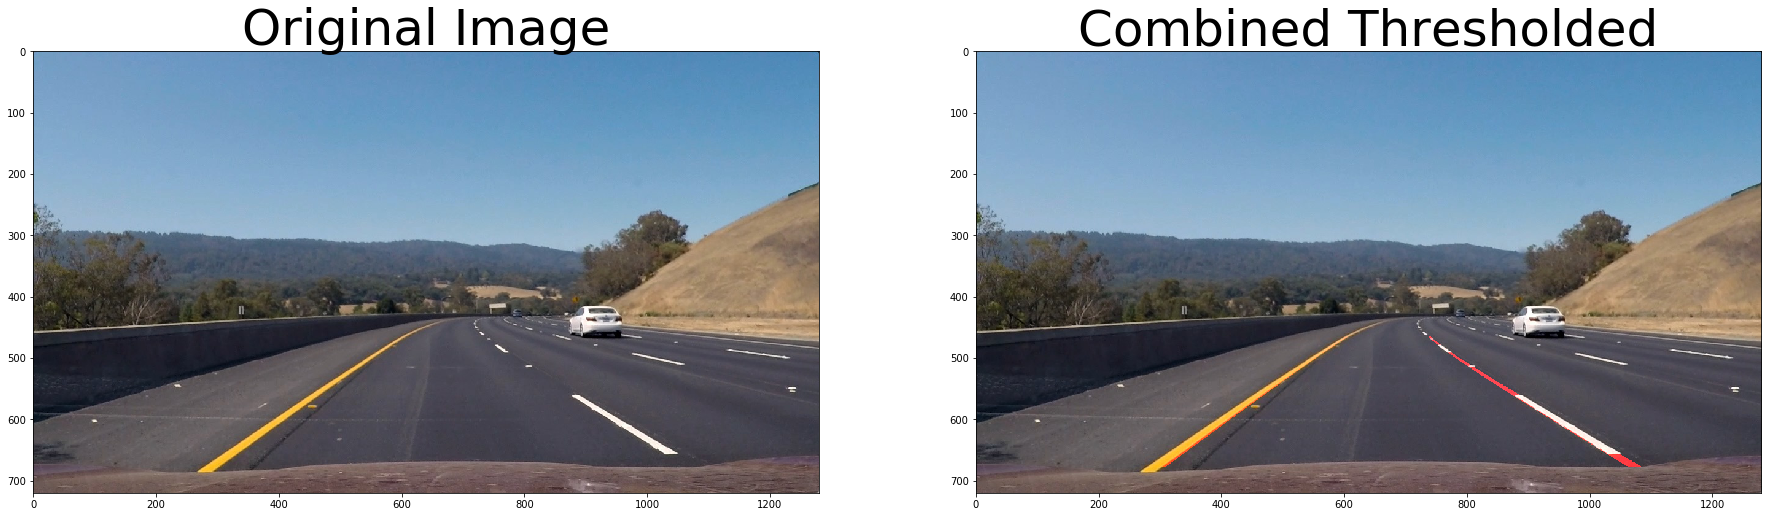

./test_images/test6.jpg
[ 9.87014466e-05 -2.42685560e-01  4.52048483e+02]
3906.8756610514233 5753.413489556304
1286.5990316006282 m 1887.0152466005363 m
[ 1.29491428e-04 -2.74867862e-01  4.76718777e+02]


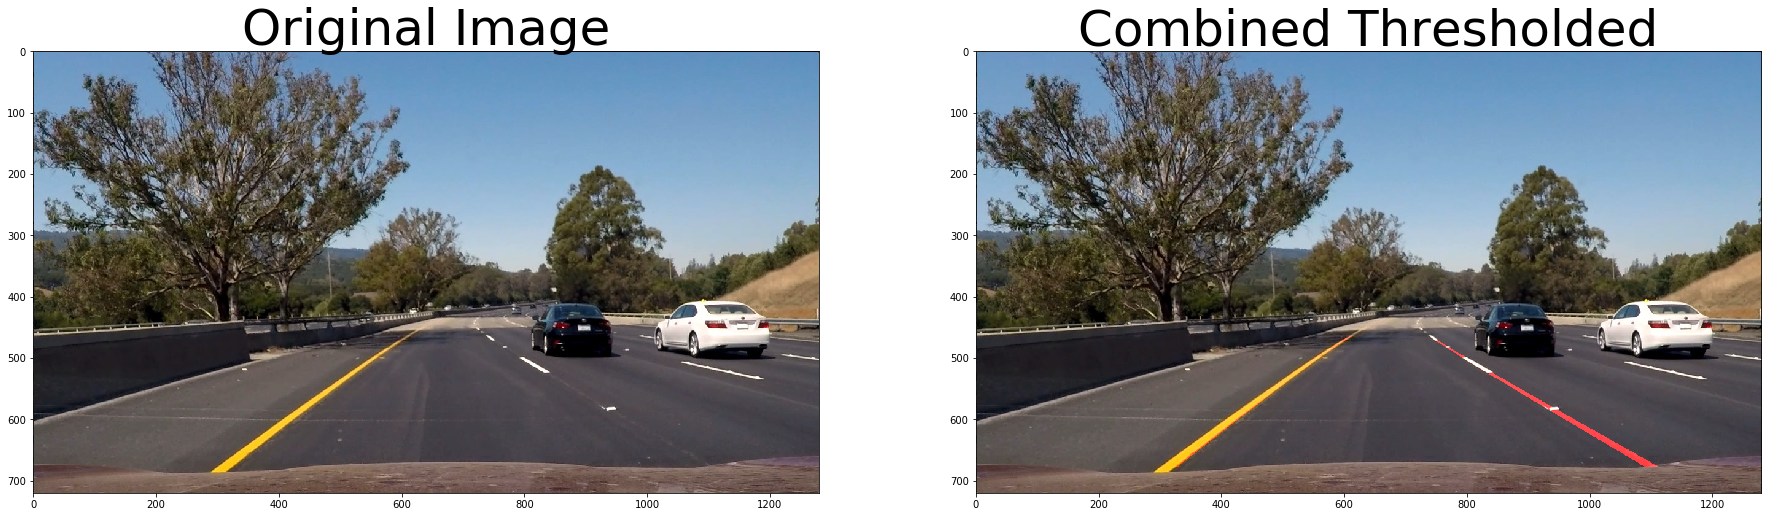

./test_images/test2.jpg
[ 1.29491428e-04 -2.74867862e-01  4.76718777e+02]
3480.9904374851535 1333.0116802571608
1157.4757418106167 m 413.9943414252343 m
[-1.43914770e-04  2.42831225e-01  2.71741192e+02]


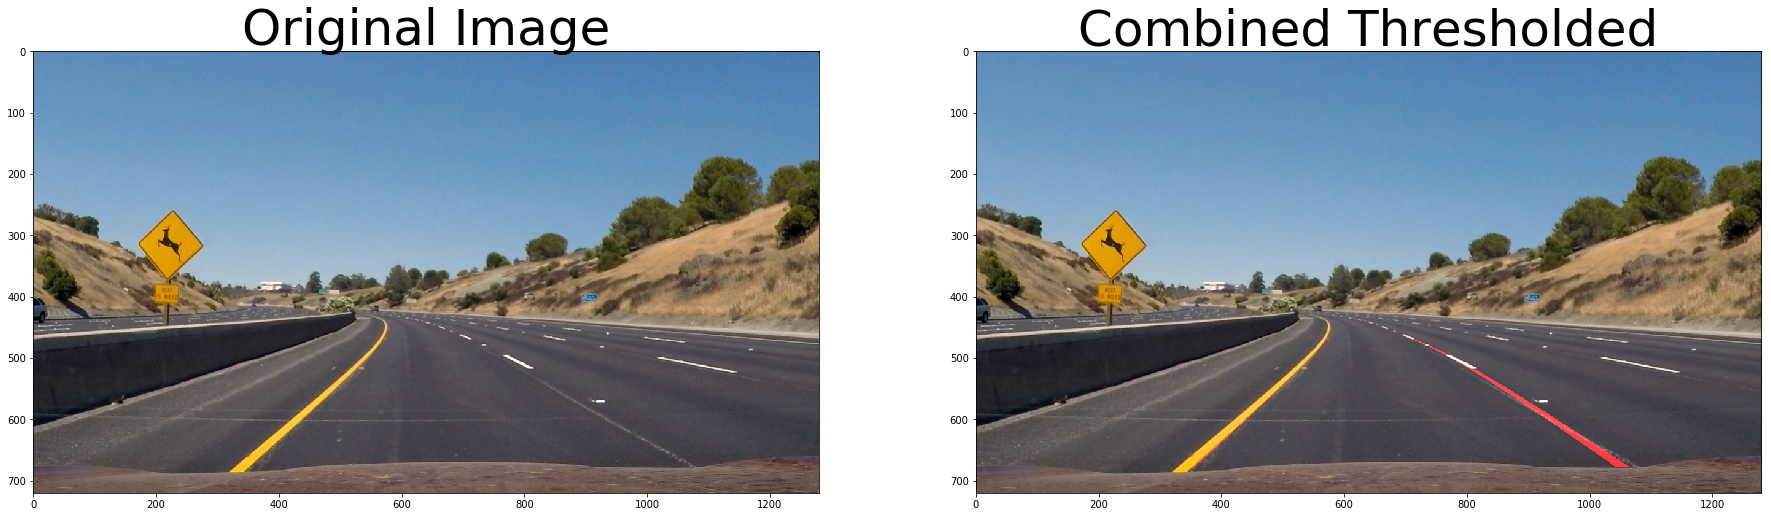

In [31]:
# Make a list of calibration images
images = glob.glob( './test_images/test*.jpg')
left_lane = Line()
right_lane = Line()

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    print(fname)
    image   = mpimg.imread(fname)
    combined_binary = pipeline(image, ksize = 9)
    if left_lane.detected:        
        out_img = update_lanes(combined_binary, left_lane, right_lane, image)         
    else:
        out_img = find_lanes(combined_binary, image)
        
    print(left_lane.current_fit)        
    warped_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    #unwarped_image = cv2.warpPerspective(warped_image, Minv, (image.shape[1], image.shape[0]), flags=cv2.INTER_NEAREST)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(out_img)
    ax2.set_title('Combined Thresholded', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()